In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Read data

In [5]:
df = pd.read_csv("../assets/TaiwanAirBox032017.csv").set_index("time")
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V507,V508,V509,V510,V511,V512,V513,V514,V515,V516
time,,,,,,,,,,,,,,,,,,,,,
1,8.234563,34.357744,41.250916,41.194228,45.758237,40.424591,36.281097,37.844685,37.835138,44.057510,...,49.152261,55.091967,44.177585,42.569721,34.833622,38.084488,44.854870,46.933081,45.600072,52.152083
2,8.074951,34.455387,39.598679,41.088167,44.970358,39.865248,37.668302,37.439057,37.459381,43.493874,...,48.586604,54.930351,44.329101,41.317196,34.651804,38.463276,45.044264,46.254293,45.387951,51.495833
3,7.918439,34.622896,38.476926,41.116787,44.305423,39.256782,39.073064,37.170659,37.277562,43.126450,...,48.238119,54.718230,44.596777,40.512650,34.616450,38.384003,45.359416,45.830051,45.212193,51.370833
4,7.629787,35.000000,37.800159,41.273497,43.786231,38.687338,38.924916,37.083538,37.134224,42.761130,...,47.738119,54.557624,45.104353,40.027802,34.730447,38.954315,45.789719,45.850253,45.290981,51.386458
5,7.533917,35.494949,37.146960,41.534969,43.316534,38.307347,38.754882,37.050830,37.390285,42.526281,...,47.731806,54.065200,45.814310,39.700529,34.954690,39.820982,46.716991,45.994192,45.903860,51.488542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,47.250000,11.000000,1.500000,4.250000,2.142857,3.000000,3.600000,1.000000,3.571429,1.857143,...,35.125000,43.250000,35.142857,27.250000,20.857143,34.142857,40.800000,32.375000,33.500000,35.000000
741,48.333333,16.333333,2.750000,6.166667,3.500000,4.250000,4.000000,2.500000,5.000000,3.000000,...,40.000000,42.222222,32.571429,19.600000,20.800000,31.500000,38.166667,32.000000,34.500000,37.500000
742,47.666667,18.833333,1.600000,4.857143,2.500000,34.114722,3.750000,2.400000,3.000000,2.400000,...,38.000000,43.000000,32.142857,14.666667,17.666667,19.000000,35.428571,30.333333,34.222222,35.333333


# 2. Visualise

### 2.1 Air quality over time per station

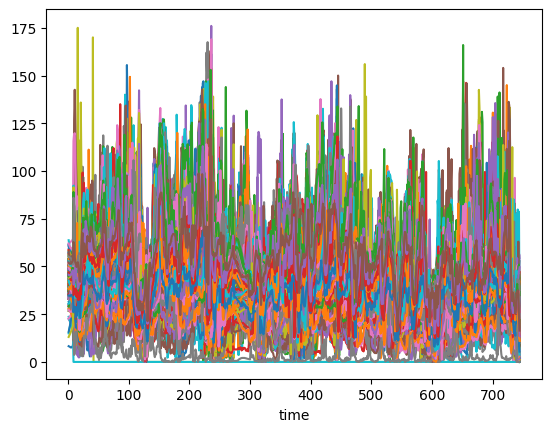

In [8]:
df.plot()
plt.legend().remove()

### 2.2 (P)ACF of mean station measurement

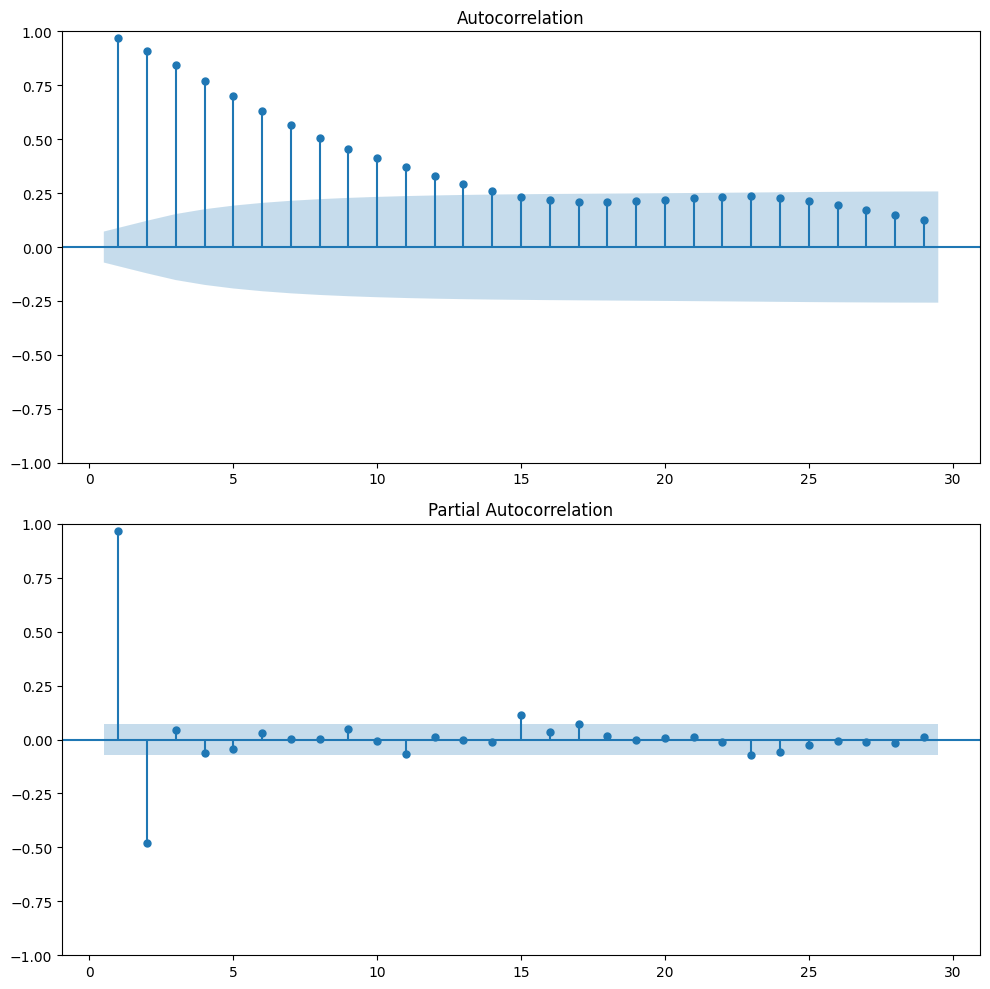

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

mu = df.mean(axis = 1)
fig, axs = plt.subplots(2, 1, figsize = (10, 10))
plot_acf(mu, ax = axs[0], zero = False)
plot_pacf(mu, ax = axs[1], zero = False)
fig.tight_layout()


Obvious AR(2) model.

### 2.3. Stationarity check

<Axes: xlabel='time'>

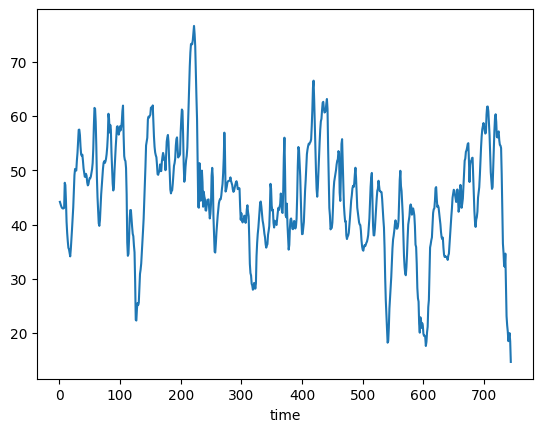

In [14]:
mu.plot()

In [17]:
from statsmodels.tsa.stattools import adfuller

res = adfuller(mu)
print(f"""
ADF Statistic: {res[0]}
p-value: {res[1]}
""")


    ADF Statistic: -5.030521393693405
    p-value: 1.930477913869776e-05
    


Reject H_0 => the (mean) series is stationary

# 2.4. Correlation matrix

/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


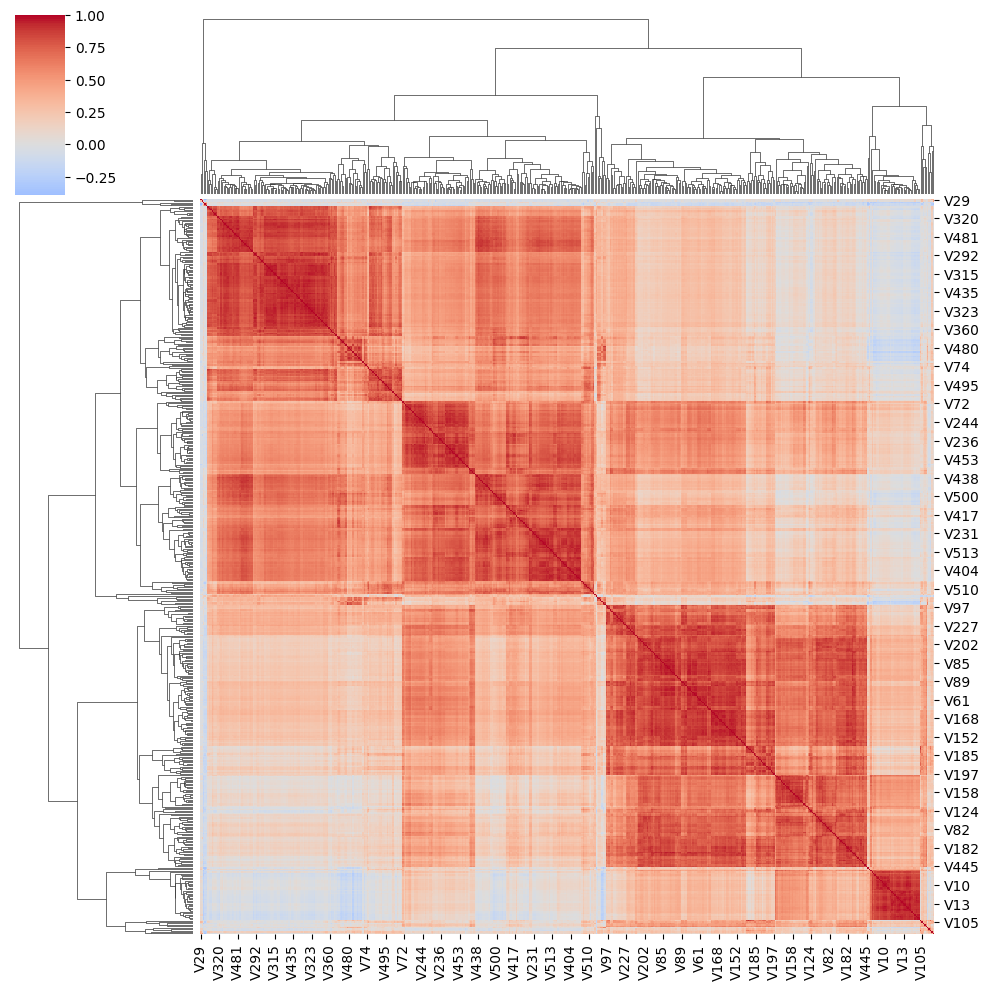

In [18]:
# clustermap

sns.clustermap(df.corr(), cmap = "coolwarm", center = 0, figsize = (10, 10))

We observe that there is structure in the correlation matrix.

Maybe split up the observation centers into 4 clusters?

Note that this does not take lagged measurements into account.

# 2.5. Distribution of PM2.5

Text(0.5, 1.0, 'Histogram of Individual Observations')

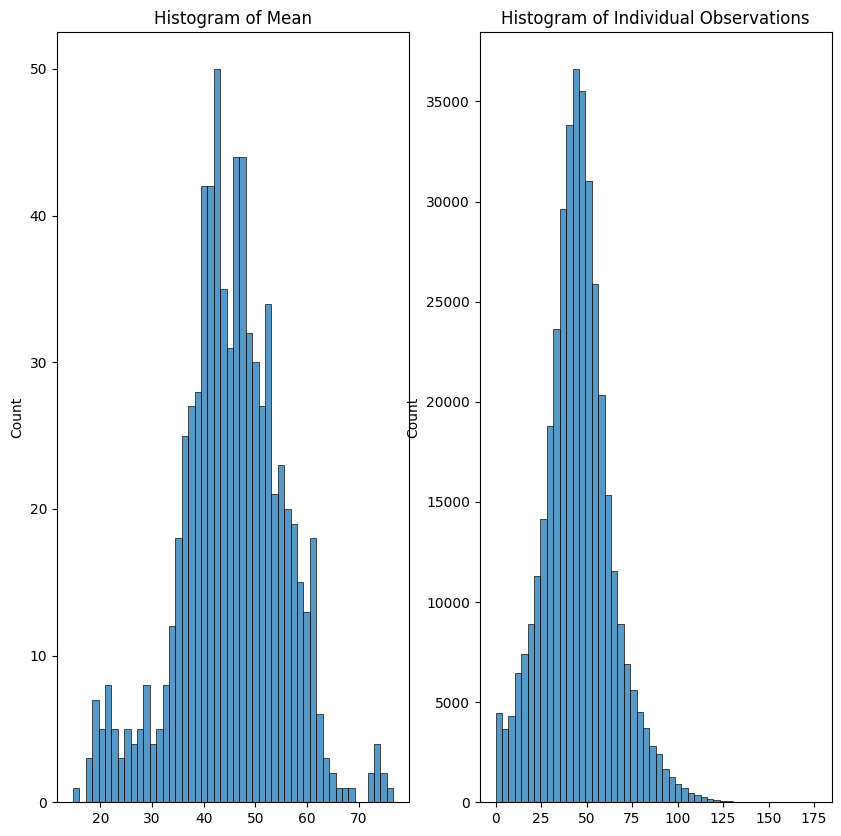

In [24]:
fig, axs = plt.subplots(1, 2, figsize = (10, 10))
sns.histplot(mu, bins = 50, ax = axs[0])
axs[0].set_title("Histogram of Mean")

# indiv obs.
sns.histplot(df.values.flatten(), bins = 50, ax = axs[1])
axs[1].set_title("Histogram of Individual Observations")

We observe a short upward tail, and the distribution is clearly asymmetric due to the cutoff at 0.

We also notice the mean doesn't follow a normal distribution. This makes sense, as the CLT is not satisfied: our measurements are not independent.
